In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 1000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('density_all')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

# Grab the MCS data
mcs_data = os.listdir('mcs_all')
try:
    mcs_data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the edge length data
edg_data = os.listdir('edg_all')
try:
    mcs_data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
print(data)
print(mcs_data)
print(edg_data)

.DS_Store not in directory
['cluster_phase_density_pa550.0_pb0.0_xa100.0_phi50_ep1.000.txt', 'phase_density_pa180.0_pb0.0_xa100.0_phi45_ep1.000.txt', 'phase_density_pa440.0_pb0.0_xa100.0_phi50_ep1.000.txt', 'phase_density_pa980.0_pb0.0_xa100.0_phi60_ep1.000.txt', 'phase_density_pa500.0_pb0.0_xa100.0_phi55_ep1.000.txt', 'phase_density_pa410.0_pb0.0_xa100.0_phi65_ep1.000.txt', 'phase_density_pa890.0_pb0.0_xa100.0_phi50_ep1.000.txt', 'phase_density_pa550.0_pb0.0_xa100.0_phi60_ep1.000.txt', 'phase_density_pa770.0_pb0.0_xa100.0_phi70_ep1.000.txt', 'phase_density_pa720.0_pb0.0_xa100.0_phi45_ep1.000.txt', 'cluster_phase_density_pa160_pb0_xa0_phi50_ep0.100.txt', 'cluster_phase_density_pa180_pb0_xa0_phi60_ep0.100.txt', 'phase_density_pa160.0_pb0.0_xa100.0_phi70_ep1.000.txt', 'phase_density_pa40.0_pb0.0_xa100.0_phi60_ep1.000.txt', 'cluster_phase_density_pa230_pb0_xa0_phi50_ep0.100.txt', 'phase_density_pa10.0_pb0.0_xa100.0_phi55_ep1.000.txt', 'phase_density_pa130.0_pb0.0_xa100.0_phi45_ep1.000.txt

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
def computePeNet(PeS, PeF, xF):
    # Make sure particle fraction is in appropriate range
    if xF > 1.:
        xF /= 100.
    # Make sure slow species is actually slower
    if PeS > PeF:
        PeS, PeF = PeF, PeS
        xF = 1. - xF
    peNet = ((1. - xF) * PeS) + (xF * PeF)
    if PeF != 0:
        peRNet = (((1. - xF)*(np.sqrt(PeS/PeF))) + xF) * peNet
    else:
        peRNet = 0.
    return peNet, peRNet

peList = []
paList = []
pbList = []
xaList = []
epList = []
phiList = []
peNetList = []
peRNetList = []
clustList = []
for i in xrange(len(data)):
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "pa"):
        paList.append(txtValue(data[i], "pa"))
    else:
        paList.append(0)
        
    if checkFile(data[i], "pb"):
        pbList.append(txtValue(data[i], "pb"))
    else:
        pbList.append(0)
        
    if checkFile(data[i], "xa"):
        xaList.append(txtValue(data[i], "xa"))
    else:
        xaList.append(100.)
        
    if checkFile(data[i], "ep"):
        epList.append(txtValue(data[i], "ep"))
    else:
        epList.append(1.)
        
    if checkFile(data[i], "phi"):
        phiList.append(txtValue(data[i], "phi"))
    else:
        phiList.append(60.)
        
    if checkFile(data[i], "cluster"):
        clustList.append(1)
    else:
        clustList.append(0)
    
    peNet, peRNet = computePeNet(paList[-1], pbList[-1], 100. - xaList[-1])
    peNetList.append(peNet)
    peRNetList.append(peRNet)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(paList, phiList, epList, clustList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(paList, indArr)
    indSort(pbList, indArr)
    indSort(xaList, indArr)
    indSort(epList, indArr)
    indSort(phiList, indArr)
    indSort(peNetList, indArr)
    indSort(peRNetList, indArr)
    indSort(clustList, indArr)

# # Print the sorted array
# print("Sorted textfiles:")
# for i in data:
#     print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir(parent)
os.chdir('density_all')
for i in xrange(len(data)):
    print(data[i])
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
phase_density_pa0.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa0.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa0.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa0.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa0.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa0.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa10.0_pb0.0_xa100.0_phi70_ep1.000.txt
cluster_phase_density_pa20_pb0_xa0_phi45_ep0.100.txt
phase_density_pa20.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa20.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa20.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa20_pb0_xa0_phi60_ep0.100.txt
phase_density_pa20.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa20.0_pb0.0_xa100.0_phi65

phase_density_pa160.0_pb0.0_xa100.0_phi50_ep1.000.txt
cluster_phase_density_pa160_pb0_xa0_phi55_ep0.100.txt
phase_density_pa160.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa160_pb0_xa0_phi60_ep0.100.txt
phase_density_pa160.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa160.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa160.0_pb0.0_xa100.0_phi70_ep1.000.txt
cluster_phase_density_pa170_pb0_xa0_phi45_ep0.100.txt
phase_density_pa170.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_phase_density_pa170_pb0_xa0_phi50_ep0.100.txt
phase_density_pa170.0_pb0.0_xa100.0_phi50_ep1.000.txt
cluster_phase_density_pa170_pb0_xa0_phi55_ep0.100.txt
phase_density_pa170.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa170_pb0_xa0_phi60_ep0.100.txt
phase_density_pa170.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa170.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa170.0_pb0.0_xa100.0_phi70_ep1.000.txt
cluster_phase_density_pa180_pb0_xa0_phi45_ep0.100.txt
phase_density_pa180.0_pb0.0_

cluster_phase_density_pa350.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa350.0_pb0.0_xa100.0_phi50_ep1.000.txt
cluster_phase_density_pa350.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa350.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa350.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa350.0_pb0.0_xa100.0_phi60_ep1.000.txt
cluster_phase_density_pa350.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa350.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa350.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa360.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa370.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa370.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa370.0_pb0.0_xa100.0_phi55_ep1.000.

phase_density_pa580.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa580.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa580.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa580.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa580.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa590.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa600.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_phase_density_pa600.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa600.0_pb0.0_xa100.0_phi50_ep1.000.txt
cluster_phase_density_pa600_pb0_xa0_phi55_ep0.100.txt
phase_density_pa600.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa600.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa600.0_pb0.0_xa100.0_phi60_ep1.000.txt
cluster_phas

phase_density_pa830.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa830.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa830.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa840.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_phase_density_pa850.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi50_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_phase_density_pa850.0_pb0.0_xa100.0_phi55_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi60_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi65_ep1.000.txt
phase_density_pa850.0_pb0.0_xa100.0_phi70_ep1.000.txt
phase_density_pa860.0_pb0.0_xa100.0_phi45_ep1.000.txt
phase_densit

Timestep  Gas-r=1.0  Liq-r=1.0  Gas-r=1.5  Liq-r=1.5  Gas-r=2.0  Liq-r=2.0  \
0      10.0       0.25        0.5       0.33      0.555      0.375        0.5   
1      20.0       0.25        0.5       0.33      0.555      0.375        0.5   
2      30.0       0.25        0.5       0.33      0.555      0.375        0.5   
3      40.0       0.25        0.5       0.33      0.555      0.375        0.5   
4      50.0       0.25        0.5       0.33      0.555      0.375        0.5   
5      60.0       0.25        0.5       0.33      0.555      0.375        0.5   
6      70.0       0.25        0.5       0.33      0.555      0.375        0.5   
7      80.0       0.25        0.5       0.33      0.555      0.375        0.5   
8      90.0       0.25        0.5       0.33      0.555      0.375        0.5   
9      99.9       0.25        0.5       0.33      0.555      0.375        0.5   

   Gas-r=2.5  Liq-r=2.5  Gas-r=3.0  Liq-r=3.0  Gas-r=3.5  Liq-r=3.5  \
0      0.395       0.48      0.385       0.47      0.385      0.465   
1      0.395       0.48      0.385       0.47      0.385      0.465   
2      0.395       0.48      0.385       0.47      0.385      0.465   
3      0.395       0.48      0.385       0.47      0.385      0.465   
4      0.395       0.48      0.385       0.47      0.385      0.465   
5      0.395       0.48      0.385       0.47      0.385      0.465   
6      0.395       0.48      0.385       0.47      0.385      0.465   
7      0.395       0.48      0.385       0.47      0.385      0.465   
8      0.395       0.48      0.385       0.47      0.385      0.465   
9      0.395       0.48      0.385       0.47      0.385      0.465   

   Gas-r=4.0  Liq-r=4.0  Gas-r=4.5  Liq-r=4.5  Gas-r=5.0  Liq-r=5.0  
0       0.39      0.465      0.395      0.455      0.405      0.455  
1       0.39      0.465      0.395      0.455      0.405      0.455  
2       0.39      0.465      0.395      0.455      0.405      0.455  
3       0.39      0.465      0.395      0.455      0.405      0.455  
4       0.39      0.465      0.395      0.455      0.405      0.455  
5       0.39      0.465      0.395      0.455      0.405      0.455  
6       0.39      0.465      0.395      0.455      0.405      0.455  
7       0.39      0.465      0.395      0.455      0.420      0.455  
8       0.39      0.465      0.395      0.455      0.405      0.455  
9       0.39      0.465      0.395      0.455      0.405      0.455

In [5]:
# Do the same for the MCS data
mcs_peList = []
mcs_paList = []
mcs_pbList = []
mcs_xaList = []
mcs_epList = []
mcs_phiList = []
mcs_peNetList = []
mcs_peRNetList = []
mcs_clustList = []
for i in xrange(len(mcs_data)):
    if checkFile(mcs_data[i], "pe"):
        mcs_peList.append(txtValue(mcs_data[i], "pe"))
    else:
        mcs_peList.append(0)
    
    if checkFile(mcs_data[i], "pa"):
        mcs_paList.append(txtValue(mcs_data[i], "pa"))
    else:
        mcs_paList.append(0)
        
    if checkFile(mcs_data[i], "pb"):
        mcs_pbList.append(txtValue(mcs_data[i], "pb"))
    else:
        mcs_pbList.append(0)
        
    if checkFile(mcs_data[i], "xa"):
        mcs_xaList.append(txtValue(mcs_data[i], "xa"))
    else:
        mcs_xaList.append(100.)
        
    if checkFile(mcs_data[i], "ep"):
        mcs_epList.append(txtValue(mcs_data[i], "ep"))
    else:
        mcs_epList.append(1.)
        
    if checkFile(mcs_data[i], "phi"):
        mcs_phiList.append(txtValue(mcs_data[i], "phi"))
    else:
        mcs_phiList.append(60.)
        
    if checkFile(mcs_data[i], "cluster"):
        mcs_clustList.append(1)
    else:
        mcs_clustList.append(0)
    
    peNet, peRNet = computePeNet(mcs_paList[-1], mcs_pbList[-1], 100. - mcs_xaList[-1])
    mcs_peNetList.append(peNet)
    mcs_peRNetList.append(peRNet)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(mcs_paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(mcs_paList, mcs_phiList, mcs_epList, mcs_clustList)
    indSort(mcs_data, indArr)
    indSort(mcs_peList, indArr)
    indSort(mcs_paList, indArr)
    indSort(mcs_pbList, indArr)
    indSort(mcs_xaList, indArr)
    indSort(mcs_epList, indArr)
    indSort(mcs_phiList, indArr)
    indSort(mcs_peNetList, indArr)
    indSort(mcs_peRNetList, indArr)
    indSort(mcs_clustList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in mcs_data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
mcs = []
os.chdir(parent)
os.chdir('mcs_all')
for i in xrange(len(mcs_data)):
    df = pd.read_csv(mcs_data[i], sep='\s+', header=0)
    mcs.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(mcs[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
MCS_pa0.0_pb0.0_xa100.0_phi45_ep1.000.txt
MCS_pa0.0_pb0.0_xa100.0_phi50_ep1.000.txt
MCS_pa0.0_pb0.0_xa100.0_phi55_ep1.000.txt
MCS_pa0.0_pb0.0_xa100.0_phi60_ep1.000.txt
MCS_pa0.0_pb0.0_xa100.0_phi65_ep1.000.txt
MCS_pa0.0_pb0.0_xa100.0_phi70_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi45_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi50_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi55_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi60_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi65_ep1.000.txt
MCS_pa10.0_pb0.0_xa100.0_phi70_ep1.000.txt
cluster_MCS_pa20_pb0_xa0_phi45_ep0.100.txt
MCS_pa20.0_pb0.0_xa100.0_phi45_ep1.000.txt
MCS_pa20.0_pb0.0_xa100.0_phi50_ep1.000.txt
MCS_pa20.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_MCS_pa20_pb0_xa0_phi60_ep0.100.txt
MCS_pa20.0_pb0.0_xa100.0_phi60_ep1.000.txt
MCS_pa20.0_pb0.0_xa100.0_phi65_ep1.000.txt
MCS_pa20.0_pb0.0_xa100.0_phi70_ep1.000.txt
MCS_pa30.0_pb0.0_xa100.0_phi45_ep1.000.txt
MCS_pa30.0_pb0.0_xa100.0_phi50_ep1.000.txt
cluster_MCS_pa30_pb0_xa0_phi55

Timestep  LgClust     c1      p1  c5  p5  c10  p10  c50  p50  c100  p100  \
0         0.0        5  94226  100000   5  25    0    0    0    0     0     0   
1         0.1        5  94467  100000   3  15    0    0    0    0     0     0   
2         0.2        5  94575  100000   2  10    0    0    0    0     0     0   
3         0.3        5  94576  100000   5  25    0    0    0    0     0     0   
4         0.4        6  94670  100000   6  31    0    0    0    0     0     0   
..        ...      ...    ...     ...  ..  ..  ...  ...  ...  ...   ...   ...   
995      99.5        7  94798  100000   2  12    0    0    0    0     0     0   
996      99.6        5  94769  100000   3  15    0    0    0    0     0     0   
997      99.7        6  94796  100000   5  26    0    0    0    0     0     0   
998      99.8        5  94724  100000   4  20    0    0    0    0     0     0   
999      99.9        5  94773  100000   1   5    0    0    0    0     0     0   

     c500  p500  c1000  p1000  c5000  p5000  c10000  p10000  c50000  p50000  
0       0     0      0      0      0      0       0       0       0       0  
1       0     0      0      0      0      0       0       0       0       0  
2       0     0      0      0      0      0       0       0       0       0  
3       0     0      0      0      0      0       0       0       0       0  
4       0     0      0      0      0      0       0       0       0       0  
..    ...   ...    ...    ...    ...    ...     ...     ...     ...     ...  
995     0     0      0      0      0      0       0       0       0       0  
996     0     0      0      0      0      0       0       0       0       0  
997     0     0      0      0      0      0       0       0       0       0  
998     0     0      0      0      0      0       0       0       0       0  
999     0     0      0      0      0      0       0       0       0       0  

[1000 rows x 22 columns]

In [6]:
# Do the same for the edge length data
edg_peList = []
edg_paList = []
edg_pbList = []
edg_xaList = []
edg_epList = []
edg_phiList = []
edg_peNetList = []
edg_peRNetList = []
edg_clustList = []
for i in xrange(len(edg_data)):
    if checkFile(edg_data[i], "pe"):
        edg_peList.append(txtValue(edg_data[i], "pe"))
    else:
        edg_peList.append(0)
    
    if checkFile(edg_data[i], "pa"):
        edg_paList.append(txtValue(edg_data[i], "pa"))
    else:
        edg_paList.append(0)
        
    if checkFile(edg_data[i], "pb"):
        edg_pbList.append(txtValue(edg_data[i], "pb"))
    else:
        edg_pbList.append(0)
        
    if checkFile(edg_data[i], "xa"):
        edg_xaList.append(txtValue(edg_data[i], "xa"))
    else:
        edg_xaList.append(100.)
        
    if checkFile(edg_data[i], "ep"):
        edg_epList.append(txtValue(edg_data[i], "ep"))
    else:
        edg_epList.append(1.)
        
    if checkFile(edg_data[i], "phi"):
        edg_phiList.append(txtValue(edg_data[i], "phi"))
    else:
        edg_phiList.append(60.)
        
    if checkFile(edg_data[i], "cluster"):
        edg_clustList.append(1)
    else:
        edg_clustList.append(0)
    
    peNet, peRNet = computePeNet(edg_paList[-1], edg_pbList[-1], 100. - edg_xaList[-1])
    edg_peNetList.append(peNet)
    edg_peRNetList.append(peRNet)

# Take a look at your lists
# print(peList)
# print(paList) 
# print(pbList) 
# print(xaList) 
# print(epList) 
# print(phiList)        

# Sort the arrays
if len(edg_paList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(edg_paList, edg_phiList, edg_epList, edg_clustList)
    indSort(edg_data, indArr)
    indSort(edg_peList, indArr)
    indSort(edg_paList, indArr)
    indSort(edg_pbList, indArr)
    indSort(edg_xaList, indArr)
    indSort(edg_epList, indArr)
    indSort(edg_phiList, indArr)
    indSort(edg_peNetList, indArr)
    indSort(edg_peRNetList, indArr)
    indSort(edg_clustList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in edg_data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
edg = []
os.chdir(parent)
os.chdir('edg_all')
for i in xrange(len(edg_data)):
    df = pd.read_csv(edg_data[i], sep='\s+', header=0)
    edg.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(edg[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
edge_pa0.0_pb0.0_xa100.0_phi45_ep1.000.txt
edge_pa0.0_pb0.0_xa100.0_phi50_ep1.000.txt
edge_pa0.0_pb0.0_xa100.0_phi55_ep1.000.txt
edge_pa0.0_pb0.0_xa100.0_phi60_ep1.000.txt
edge_pa0.0_pb0.0_xa100.0_phi65_ep1.000.txt
edge_pa0.0_pb0.0_xa100.0_phi70_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi45_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi50_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi55_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi60_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi65_ep1.000.txt
edge_pa10.0_pb0.0_xa100.0_phi70_ep1.000.txt
cluster_edge_pa20.0_pb0.0_xa100.0_phi45_ep0.100.txt
edge_pa20.0_pb0.0_xa100.0_phi45_ep1.000.txt
cluster_edge_pa20.0_pb0.0_xa100.0_phi50_ep0.100.txt
edge_pa20.0_pb0.0_xa100.0_phi50_ep1.000.txt
edge_pa20.0_pb0.0_xa100.0_phi55_ep1.000.txt
cluster_edge_pa20.0_pb0.0_xa100.0_phi60_ep0.100.txt
edge_pa20.0_pb0.0_xa100.0_phi60_ep1.000.txt
cluster_edge_pa20.0_pb0.0_xa100.0_phi65_ep0.100.txt
edge_pa20.0_pb0.0_xa100.0_phi65_ep1.000.txt
edge_pa20.0_pb0.0_xa

Timestep  Length
0      99.9     0.0

In [7]:
print(len(data))
print(len(mcs))
print(len(edg))
print(sum(clustList))
print(sum(mcs_clustList))
print(sum(edg_clustList))

keepInd = []

# Loop through phase density files
for i in range(0, len(clustList)):
    # Loop through edge length files
    for j in range(0, len(edg_clustList)):
        # Check if we've found a matching file
        if edg_paList[j] == paList[i]:
            if edg_phiList[j] == phiList[i]:
                if edg_epList[j] == epList[i]:
                    if edg_clustList[j] == clustList[i]:
                        # We have a match, keep the matching index
                        keepInd.append(j)

badInd = []
for i in range(0, len(edg_clustList)):
    if i not in keepInd:
        badInd.append(i)

print(len(edg_clustList) - len(badInd))
print(len(clustList))

# Now remove the unmatched files
for i in range(len(badInd), 0, -1):
    print("Removing {}").format(edg_data[i])
    del edg[i]
    del edg_data[i]
    del edg_peList[i]
    del edg_paList[i]
    del edg_pbList[i]
    del edg_xaList[i]
    del edg_epList[i]
    del edg_phiList[i]
    del edg_peNetList[i]
    del edg_peRNetList[i]

786
786
834
150
150
198
786
786
Removing cluster_edge_pa50.0_pb0.0_xa100.0_phi60_ep0.100.txt
Removing edge_pa50.0_pb0.0_xa100.0_phi55_ep1.000.txt
Removing cluster_edge_pa50.0_pb0.0_xa100.0_phi55_ep0.100.txt
Removing edge_pa50.0_pb0.0_xa100.0_phi50_ep1.000.txt
Removing cluster_edge_pa50.0_pb0.0_xa100.0_phi50_ep0.100.txt
Removing edge_pa50.0_pb0.0_xa100.0_phi45_ep1.000.txt
Removing cluster_edge_pa50.0_pb0.0_xa100.0_phi45_ep0.100.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi70_ep1.000.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi65_ep1.000.txt
Removing cluster_edge_pa40.0_pb0.0_xa100.0_phi65_ep0.100.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi60_ep1.000.txt
Removing cluster_edge_pa40.0_pb0.0_xa100.0_phi60_ep0.100.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi55_ep1.000.txt
Removing cluster_edge_pa40.0_pb0.0_xa100.0_phi55_ep0.100.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi50_ep1.000.txt
Removing cluster_edge_pa40.0_pb0.0_xa100.0_phi50_ep0.100.txt
Removing edge_pa40.0_pb0.0_xa100.0_phi45_ep1.000.txt
Rem

In [8]:
# # If the data hasn't run for long enough, delete it
# for j in range(len(all_data)-1, 0, -1):
#     if all_data[j]['Timestep'].iloc[-1] < 50.:
#         print("Removing {}").format(data[j])
#         del all_data[j]
#         del data[j]
#         del peList[j]
#         del paList[j]
#         del pbList[j]
#         del xaList[j]
#         del epList[j]
#         del phiList[j]
#         del peNetList[j]
#         del peRNetList[j]
#         del mcs[j]
#         del mcs_data[j]
#         del mcs_peList[j]
#         del mcs_paList[j]
#         del mcs_pbList[j]
#         del mcs_xaList[j]
#         del mcs_epList[j]
#         del mcs_phiList[j]
#         del mcs_peNetList[j]
#         del mcs_peRNetList[j]
#         del edg[i]
#         del edg_data[i]
#         del edg_peList[i]
#         del edg_paList[i]
#         del edg_pbList[i]
#         del edg_xaList[i]
#         del edg_epList[i]
#         del edg_phiList[i]
#         del edg_peNetList[i]
#         del edg_peRNetList[i]

# # Same for MCS data
# for j in range(len(mcs)-1, 0, -1):
#     if mcs[j]['Timestep'].iloc[-1] < 50.:
#         print("Removing {}").format(mcs_data[j])
#         del all_data[j]
#         del peList[j]
#         del paList[j]
#         del pbList[j]
#         del xaList[j]
#         del epList[j]
#         del phiList[j]
#         del peNetList[j]
#         del peRNetList[j]
#         del mcs[j]
#         del mcs_peList[j]
#         del mcs_paList[j]
#         del mcs_pbList[j]
#         del mcs_xaList[j]
#         del mcs_epList[j]
#         del mcs_phiList[j]
#         del mcs_peNetList[j]
#         del mcs_peRNetList[j]
#         del edg[i]
#         del edg_data[i]
#         del edg_peList[i]
#         del edg_paList[i]
#         del edg_pbList[i]
#         del edg_xaList[i]
#         del edg_epList[i]
#         del edg_phiList[i]
#         del edg_peNetList[i]
#         del edg_peRNetList[i]

In [9]:
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon, mindt=0.00001):
    if epsilon == 1.:
        mindt = 0.000001
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * mindt))
    return 1. / tstepPerTau

# Grab the parameters from each file, store in a dataframe
headers = ['N', 'pe', 'peA', 'peB', 'xA', 'peR', 'peNet', 'peRNet', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in xrange(len(all_data)):
    partNum = mcs[i]['p1'].iloc[0]
    pe = int(peList[i])
    pa = int(paList[i])
    pb = int(pbList[i])
    xa = float(xaList[i])
    if xa != 0 and xa != 100:
        if pa > pb:
            peR = float(pb) / float(pa)
        else:
            peR = float(pa) / float(pb)
    else:
        peR = 1.
    peNet = float(peNetList[i])
    peRNet = float(peRNetList[i])
    ep = float(epList[i])
    phi = float(phiList[i])
    if ep == 1:
        tauPerdt = computeTauPerTstep(ep, 0.000001)
    else:
        tauPerdt = computeTauPerTstep(ep)
    df = pd.DataFrame([[partNum, pe, pa, pb, xa, peR, peNet, peRNet, ep, phi, tauPerdt]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

N pe   peA peB     xA  peR   peNet  peRNet  eps   phi  tauPer_dt
0     100000  0     0   0  100.0  1.0     0.0     0.0  1.0  45.0   0.000001
1     100000  0     0   0  100.0  1.0     0.0     0.0  1.0  50.0   0.000001
2     100000  0     0   0  100.0  1.0     0.0     0.0  1.0  55.0   0.000001
3     100000  0     0   0  100.0  1.0     0.0     0.0  1.0  60.0   0.000001
4     100000  0     0   0  100.0  1.0     0.0     0.0  1.0  65.0   0.000001
..       ... ..   ...  ..    ...  ...     ...     ...  ...   ...        ...
781   100000  0  1000   0  100.0  1.0  1000.0  1000.0  1.0  55.0   0.000001
782  1000000  0  1000   0  100.0  1.0  1000.0  1000.0  1.0  55.0   0.000001
783   100000  0  1000   0  100.0  1.0  1000.0  1000.0  1.0  60.0   0.000001
784   100000  0  1000   0  100.0  1.0  1000.0  1000.0  1.0  65.0   0.000001
785   100000  0  1000   0  100.0  1.0  1000.0  1000.0  1.0  70.0   0.000001

[786 rows x 11 columns]

In [10]:
# Let's add columns to the time-resolved simulation data
for i in xrange(len(all_data)):
    # Ger rid of NaN in favor of 0
    all_data[i].fillna(0, inplace=True)

# display(all_data[0][0])
headers=list(all_data[0])
display(all_data[0])
print(all_data[0][headers[1]][0])
print(all_data[0][headers[2]][0])

Timestep  Gas-r=1.0  Liq-r=1.0  Gas-r=1.5  Liq-r=1.5  Gas-r=2.0  Liq-r=2.0  \
0      10.0       0.25        0.5       0.33      0.555      0.375        0.5   
1      20.0       0.25        0.5       0.33      0.555      0.375        0.5   
2      30.0       0.25        0.5       0.33      0.555      0.375        0.5   
3      40.0       0.25        0.5       0.33      0.555      0.375        0.5   
4      50.0       0.25        0.5       0.33      0.555      0.375        0.5   
5      60.0       0.25        0.5       0.33      0.555      0.375        0.5   
6      70.0       0.25        0.5       0.33      0.555      0.375        0.5   
7      80.0       0.25        0.5       0.33      0.555      0.375        0.5   
8      90.0       0.25        0.5       0.33      0.555      0.375        0.5   
9      99.9       0.25        0.5       0.33      0.555      0.375        0.5   

   Gas-r=2.5  Liq-r=2.5  Gas-r=3.0  Liq-r=3.0  Gas-r=3.5  Liq-r=3.5  \
0      0.395       0.48      0.385       0.47      0.385      0.465   
1      0.395       0.48      0.385       0.47      0.385      0.465   
2      0.395       0.48      0.385       0.47      0.385      0.465   
3      0.395       0.48      0.385       0.47      0.385      0.465   
4      0.395       0.48      0.385       0.47      0.385      0.465   
5      0.395       0.48      0.385       0.47      0.385      0.465   
6      0.395       0.48      0.385       0.47      0.385      0.465   
7      0.395       0.48      0.385       0.47      0.385      0.465   
8      0.395       0.48      0.385       0.47      0.385      0.465   
9      0.395       0.48      0.385       0.47      0.385      0.465   

   Gas-r=4.0  Liq-r=4.0  Gas-r=4.5  Liq-r=4.5  Gas-r=5.0  Liq-r=5.0  
0       0.39      0.465      0.395      0.455      0.405      0.455  
1       0.39      0.465      0.395      0.455      0.405      0.455  
2       0.39      0.465      0.395      0.455      0.405      0.455  
3       0.39      0.465      0.395      0.455      0.405      0.455  
4       0.39      0.465      0.395      0.455      0.405      0.455  
5       0.39      0.465      0.395      0.455      0.405      0.455  
6       0.39      0.465      0.395      0.455      0.405      0.455  
7       0.39      0.465      0.395      0.455      0.420      0.455  
8       0.39      0.465      0.395      0.455      0.405      0.455  
9       0.39      0.465      0.395      0.455      0.405      0.455

0.25
0.5


In [11]:
%%capture
# Plot each column vs time for all files
for z in list(all_data[0]):
    for i in xrange(len(all_data)):
        plt.plot(all_data[i]['Timestep'], all_data[i][z], c=plt.cm.jet(params['peNet'][i] / max(params['peNet'])), label=(params['pe'][i]))
    plt.xlabel(r'Time $(\tau_{r})$')
    plt.ylabel(z)
    plt.title(z)
#     plt.legend()
    plt.show()

Totals


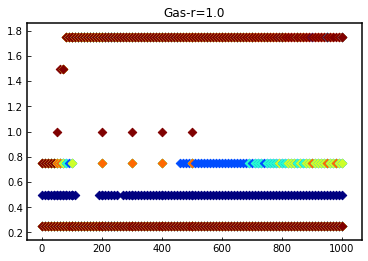

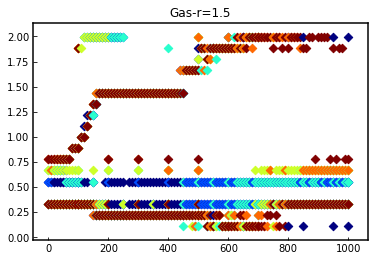

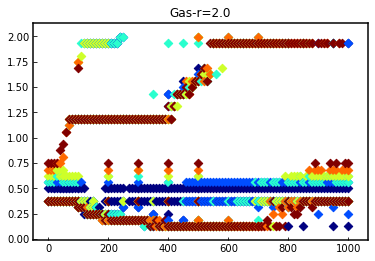

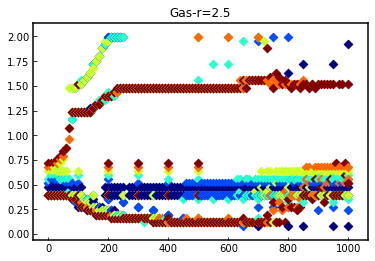

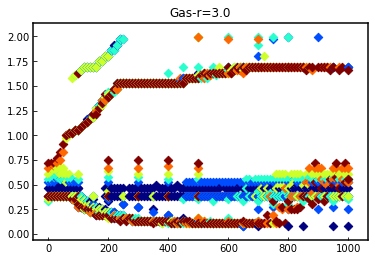

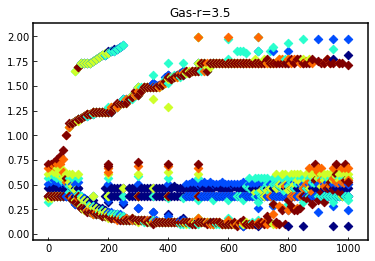

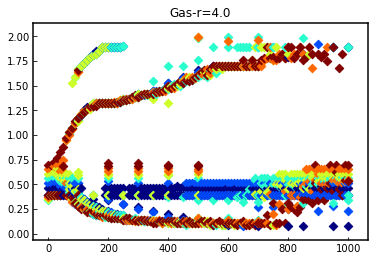

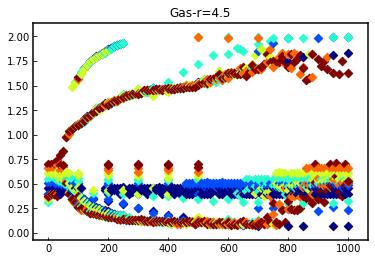

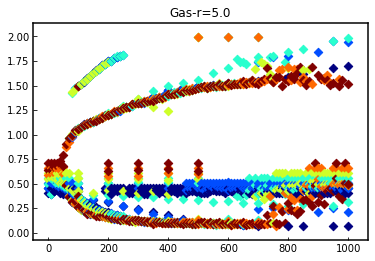

In [12]:
# Let's try and plot phiG and phiC vs peNet
print("Totals")

headers=list(all_data[0])
# for j in range(1, len(headers) - 1, 2):
#     # We want columns, phi= 45, 50, 55, 60, 65, 70
#     for i in xrange(len(all_data)):
#         plt.scatter(params['peA'][i], all_data[i][headers[j]][0], c=plt.cm.jet(params['peA'][i]/500.), marker='D')
#         plt.scatter(params['peA'][i], all_data[i][headers[j+1]][0], c=plt.cm.jet(params['peA'][i]/500.), marker='D')
#     plt.title(headers[j])
#     plt.ylim(0, 1.2)
#     plt.show()
    
for j in range(1, len(headers) - 1, 2):
    # We want columns, phi= 45, 50, 55, 60, 65, 70
    for i in xrange(len(all_data)):
        plt.scatter(params['peA'][i], all_data[i][headers[j]].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
        plt.scatter(params['peA'][i], all_data[i][headers[j+1]].iloc[-1], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
    plt.title(headers[j])
#     plt.ylim(0, 1.6)
    plt.show()

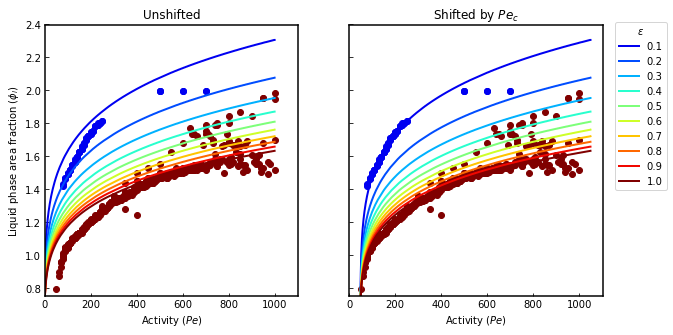

In [13]:
# Functions to plot analytical approach

# Lennard-Jones force
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU
# Force of a collision at some angle and activity
def collisionForce(pe, angle):
    return pe - (pe * np.cos(angle))
# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
# From lattice spacing, get area fraction
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return phiCP / (latIn**2)
# Let's do this at constant epsilon
def convergeConstEps(pe, eps, angle):
    out = []
    for i in pe:
        r = 1.112
        while ljForce(r, eps) < collisionForce(i, angle):
            r -= 0.0001
        out.append(latToPhi(r))
    return out

# Let's see how the data fits onto the predicted LJ curve
epsRange = np.arange(0.1, 1.1, 0.1)
# epsRange = [0.1, 1.0]
peRange = np.arange(0., 1000., 1.)
angle = np.pi/1.

# Get phi vs pe at constant epsilon
shift = 0.
shift = 50.
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10, 5))
for i in epsRange:
    ax[0].plot(peRange, convergeConstEps(peRange, i, angle), c=plt.cm.jet(i/max(epsRange)), label="{0:.1f}".format(i), lw=2.0)
    ax[1].plot(peRange+shift, convergeConstEps(peRange, i, angle), c=plt.cm.jet(i/max(epsRange)), label="{0:.1f}".format(i), lw=2.0)
ax[1].legend(title=r'$\epsilon$', loc='center', bbox_to_anchor=(1.15, 0.7))
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Liquid phase area fraction $(\phi_{l})$')

# Overlay data on top of this
GAS="Gas-r=5.0"
LIQ="Liq-r=5.0"
for i in range(0, len(epsRange)):
    for j in range(0, len(all_data)):
        if params['eps'][j] == epsRange[i]:
#             plt.scatter(params['peA'][j], all_data[j][GAS].iloc[-1], c=plt.cm.jet(epsRange[i]))
            ax[0].scatter(params['peA'][j], all_data[j][LIQ].iloc[-1], c=plt.cm.jet(epsRange[i]))
            ax[1].scatter(params['peA'][j], all_data[j][LIQ].iloc[-1], c=plt.cm.jet(epsRange[i]))
# ax[0].set_xlim(0, 500)
ax[0].set_xlim(0,)
ax[0].set_ylim(0.75,)
# ax[1].set_xlim(0, 500)
ax[1].set_xlim(0,)
ax[1].set_ylim(0.75,)
ax[0].set_title('Unshifted')
ax[1].set_title(r'Shifted by $Pe_{c}$')
ax[1].set_yticklabels([])

plt.show()

[45.0, 50.0, 55.0, 60.0, 65.0, 70.0]


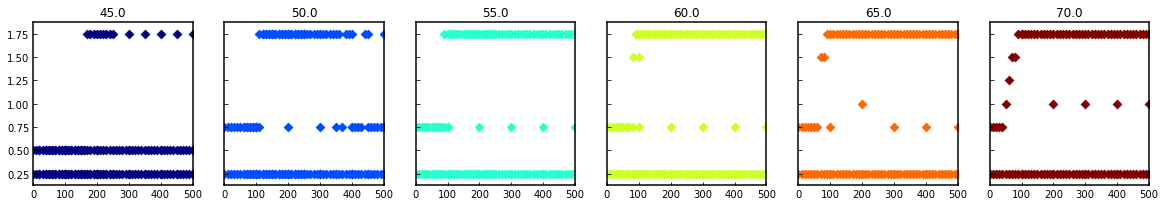

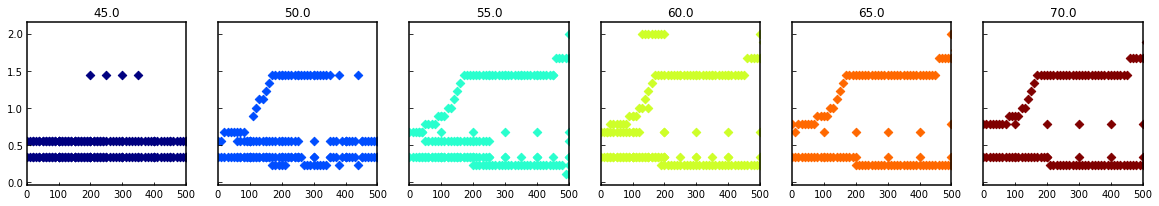

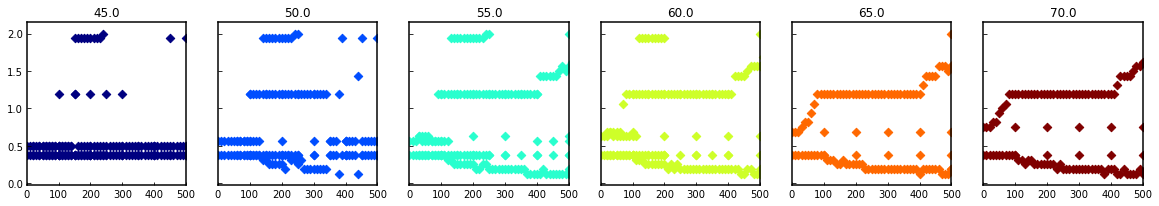

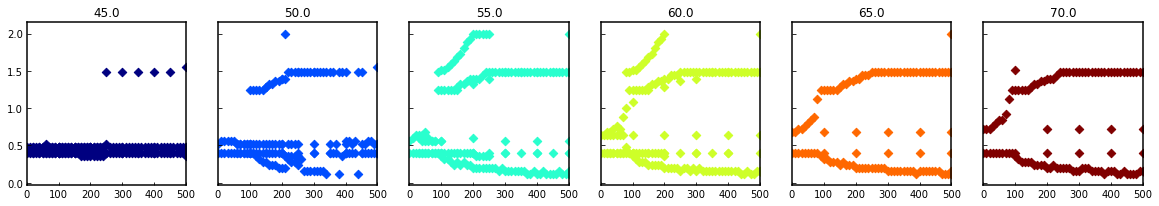

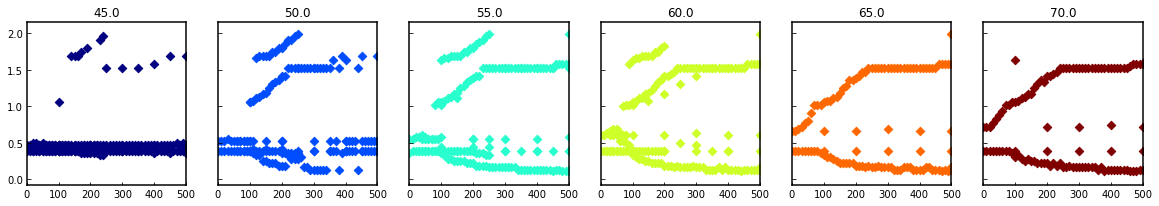

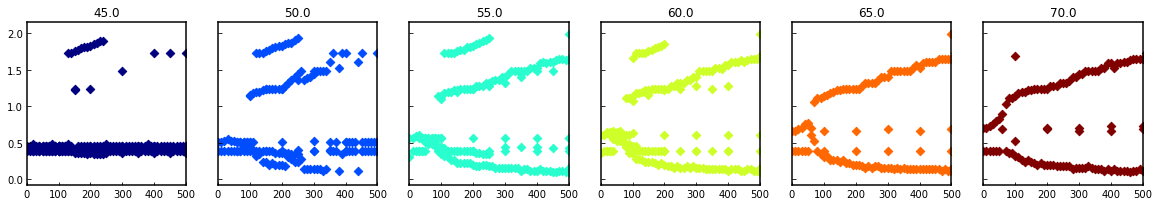

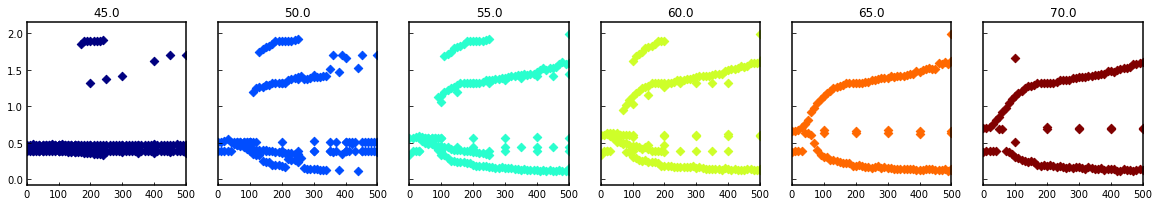

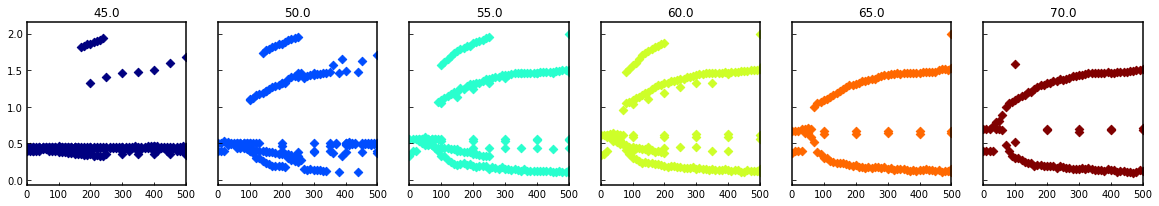

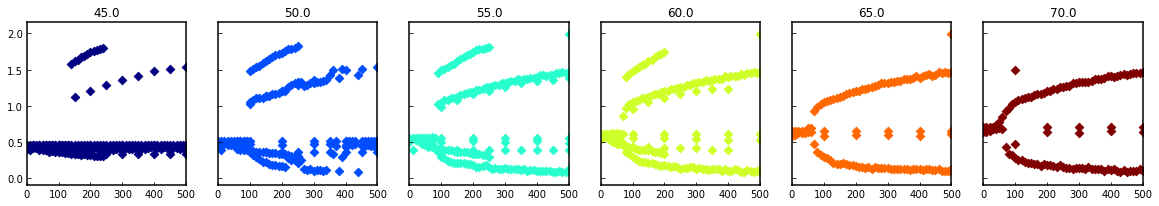

In [14]:
# Let's plot the first 4 densities side-by-side
uniquePhi = []
for i in phiList:
    if i not in uniquePhi:
        uniquePhi.append(i)
print(uniquePhi)

for j in range(1, len(headers) - 1, 2):
    # We want columns, phi= 45, 50, 55, 60, 65, 70
    fig, ax = plt.subplots(1, len(uniquePhi), figsize=(20, 3), sharey=True)
    for k in xrange(len(uniquePhi)):
        for i in xrange(len(all_data)):
            if params['phi'][i] == uniquePhi[k]:
                ax[k].scatter(params['peA'][i], all_data[i][headers[j]][0], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
                ax[k].scatter(params['peA'][i], all_data[i][headers[j+1]][0], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
        ax[k].set_xlim(0, 500.)
#         ax[k].set_ylim(0, 1.6)
        ax[k].set_title(uniquePhi[k])
    plt.subplots_adjust(hspace=0.5)
    plt.show()


[45.0, 50.0, 55.0, 60.0, 65.0, 70.0]


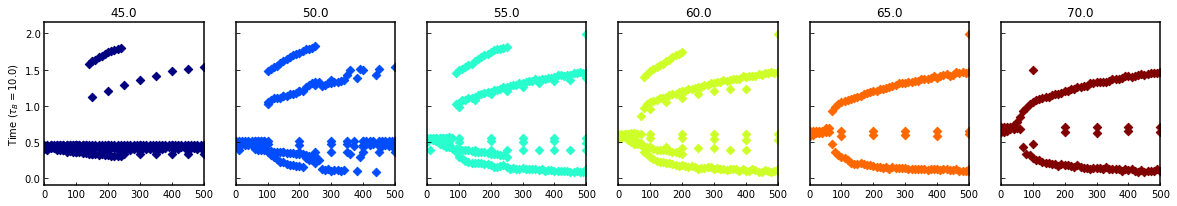

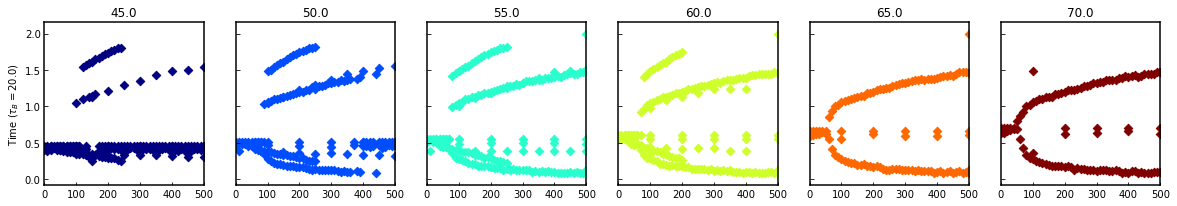

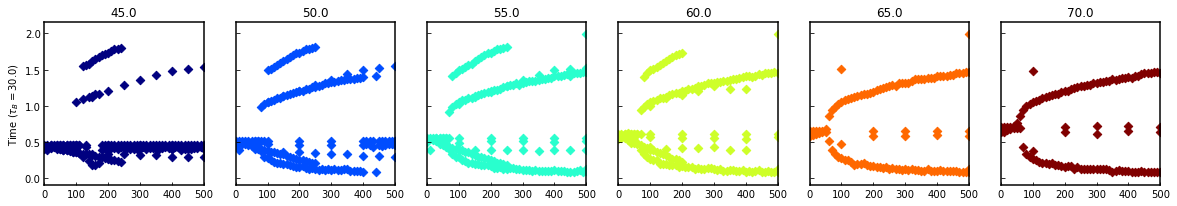

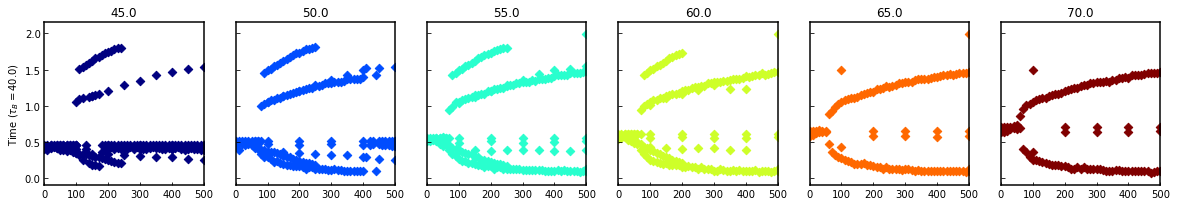

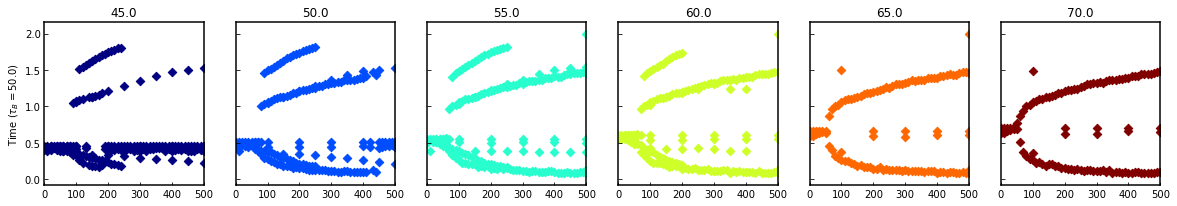

Data unavailable
Data unavailable
Data unavailable
Data unavailable


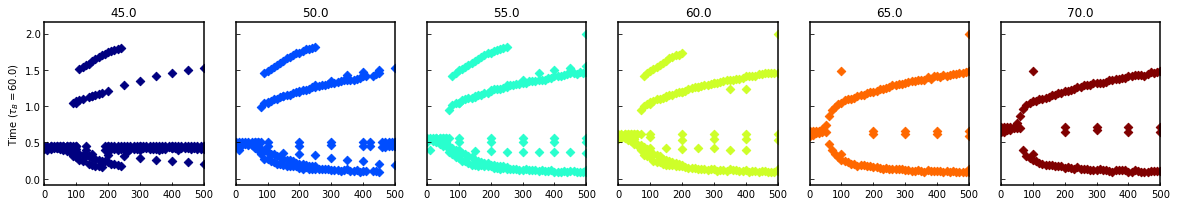

Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable


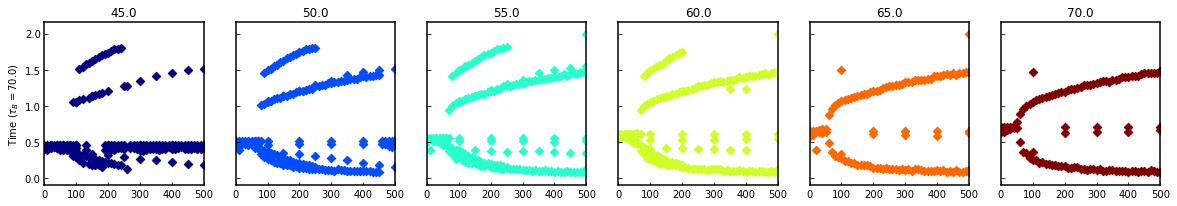

Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable


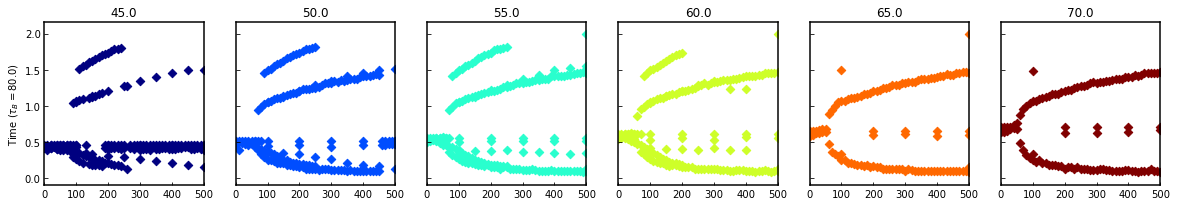

Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable


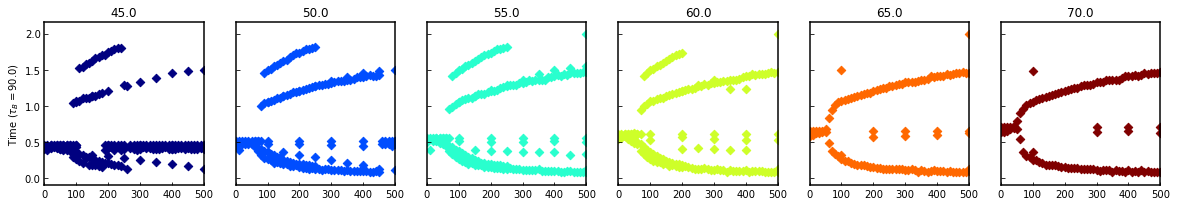

Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable
Data unavailable


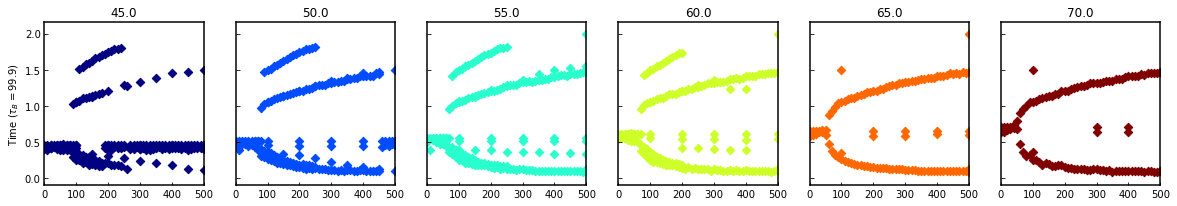

In [15]:
# Only take the r=5 search distance
uniquePhi = []
for i in phiList:
    if i not in uniquePhi:
        uniquePhi.append(i)
print(uniquePhi)


for j in range(len(headers)-2, len(headers) - 1, 2):
    # We want each time slice
    for m in xrange(len(all_data[0])):
        # We want columns, phi= 45, 50, 55, 60, 65, 70
        fig, ax = plt.subplots(1, len(uniquePhi), figsize=(20, 3), sharey=True)
        for k in xrange(len(uniquePhi)):
            for i in xrange(len(all_data)):
                if params['phi'][i] == uniquePhi[k]:
                    try:
                        ax[k].scatter(params['peA'][i], all_data[i][headers[j]][m], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
                        ax[k].scatter(params['peA'][i], all_data[i][headers[j+1]][m], c=plt.cm.jet((params['phi'][i]-45)/25.), marker='D')
                    except:
                        print("Data unavailable")
            ax[k].set_xlim(0, 500.)
#             ax[k].set_ylim(0, 1.6)
            ax[k].set_title(uniquePhi[k])
        ax[0].set_ylabel(r'Time $(\tau_{B}=$' + str(all_data[0]['Timestep'][m]) + r'$)$')
        plt.subplots_adjust(hspace=0.5)
        plt.show()


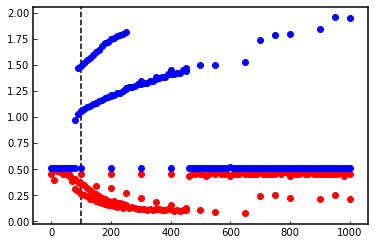

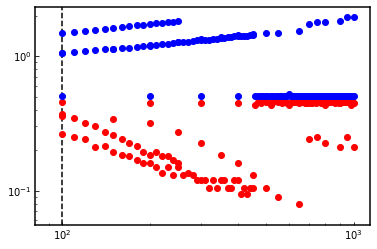

In [16]:
# Let's get an analytical expression for the local density of each phase
#  as a function of activity.
peFit = []
gas = 'Gas-r=5.0'
gasList = []
liq = 'Liq-r=5.0'
liqList = []
dens = 50.0
for i in xrange(len(all_data)):
    if params['phi'][i] == dens:
        peFit.append(params['peA'][i])
        gasList.append(all_data[i][gas].iloc[-1])
        liqList.append(all_data[i][liq].iloc[-1])

# We can cut out low Pe data (we don't need to artificially nucleate this)
peCut = 100.
# Make sure we've grabbed the appropriate data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
# plt.xlim(40, 70)
plt.show()

# Let's trim the data so we are only fitting phase separated data
for i in range(len(peFit)-1, -1, -1):
    if peFit[i] < peCut:
        del peFit[i]
        del gasList[i]
        del liqList[i]

# Plot to observe this trimming of data
plt.scatter(peFit, gasList, c='r')
plt.scatter(peFit, liqList, c='b')
plt.axvline(peCut, ls='--', lw=1.5, c='k', zorder=0)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

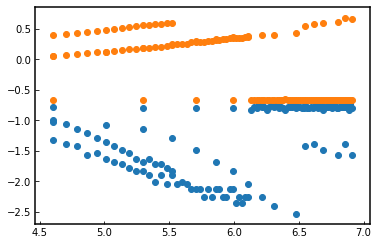

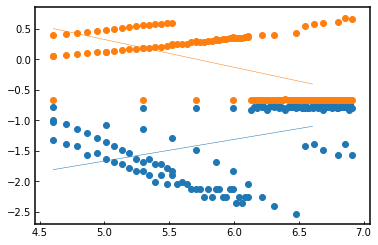

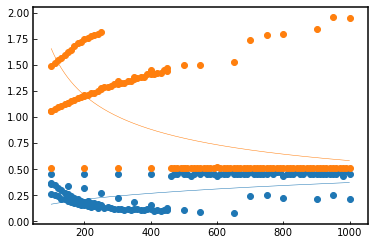

Expression for gas phase: m=0.354802714997, b=0.0320634158821
Expression for liquid phase: m=-0.454325575442, b=13.4195218853


In [17]:
# Data has been trimmed looks like a power law

# Take the natural log of the data (fit to a line in logspace)
logPe = []
logGas = []
logLiq = []
for i in xrange(len(peFit)):
    logPe.append(np.log(peFit[i]))
    logGas.append(np.log(gasList[i]))
    logLiq.append(np.log(liqList[i]))
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.show()

# Fit using linear regression
from scipy import stats
slopeG, interceptG, r_valueG, p_valueG, std_errG = stats.linregress(logPe,logGas)
slopeL, interceptL, r_valueL, p_valueL, std_errL = stats.linregress(logPe,logLiq)
rangeLog = np.arange(np.log(peCut), np.log(1000.))
def myLine(x, m, b):
    return (m*x) + b
# Plot the log of the data    
plt.scatter(logPe, logGas)
plt.scatter(logPe, logLiq)
plt.plot(rangeLog, myLine(rangeLog, slopeG, interceptG))
plt.plot(rangeLog, myLine(rangeLog, slopeL, interceptL))
plt.show()

# Plot it in real space now
rangeDat = np.arange(peCut, 1000.)
def myPow(x, m, b):
    return (x**m)*b
plt.scatter(peFit, gasList)
plt.scatter(peFit, liqList)
plt.plot(rangeDat, myPow(rangeDat, slopeG, np.exp(interceptG)))
plt.plot(rangeDat, myPow(rangeDat, slopeL, np.exp(interceptL)))
plt.show()

print("Expression for gas phase: m={}, b={}").format(slopeG, np.exp(interceptG))
print("Expression for liquid phase: m={}, b={}").format(slopeL, np.exp(interceptL))

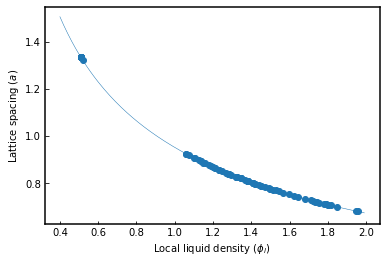

In [18]:
# Can we get the lattice spacing from the local area fraction

# We know that the lattice spacing of 1.0 has phi ~ 0.9
def phiProportion(phiIn):
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)

phis = np.arange(0.4, 2.0, 0.01)
plt.plot(phis, phiProportion(phis))
plt.scatter(liqList, phiProportion(liqList))
plt.xlabel(r'Local liquid density $(\phi_{l})$')
plt.ylabel(r'Lattice spacing $(a)$')
# plt.xlim(1., 1.5)
# plt.ylim(top=1.)
plt.show()

# print(phiProportion(1.))

In [19]:
# How many timesteps do these simulations run for?
for i in range(0, len(mcs)):
    if mcs[i]['Timestep'].iloc[-1] > 100.:
        
        mcs[i]['Timestep'] /= 2000.
        mcs[i]['Timestep'] *= 100.

['Timestep', 'LgClust', 'c1', 'p1', 'c5', 'p5', 'c10', 'p10', 'c50', 'p50', 'c100', 'p100', 'c500', 'p500', 'c1000', 'p1000', 'c5000', 'p5000', 'c10000', 'p10000', 'c50000', 'p50000']


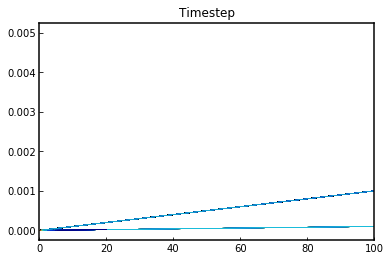

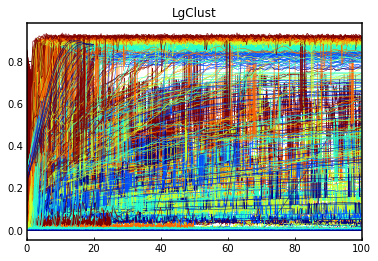

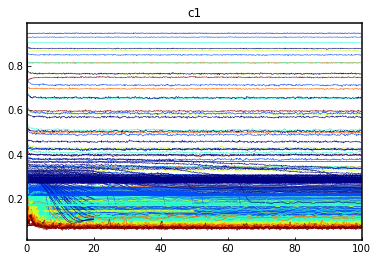

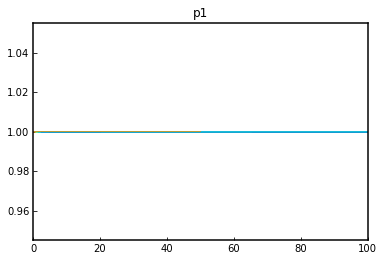

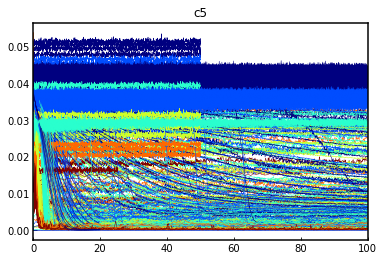

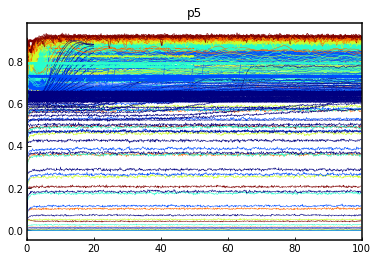

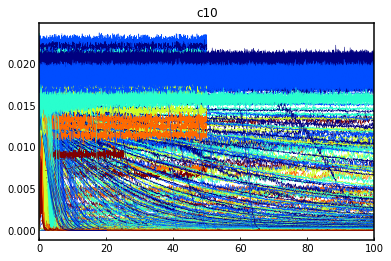

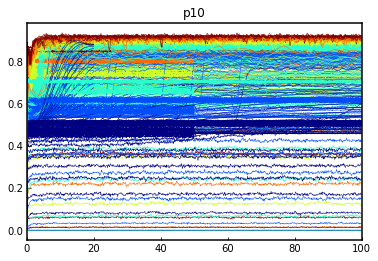

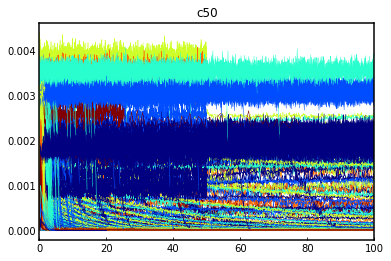

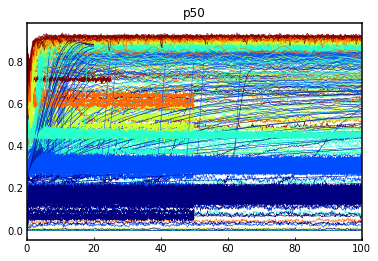

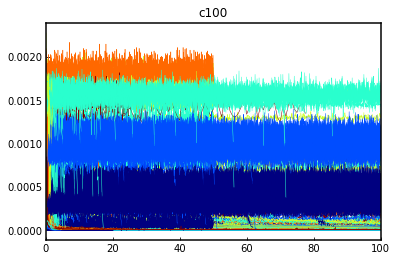

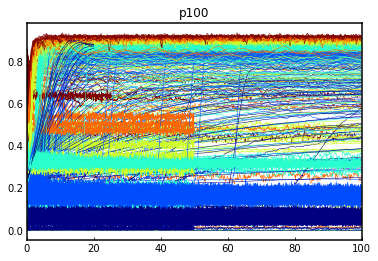

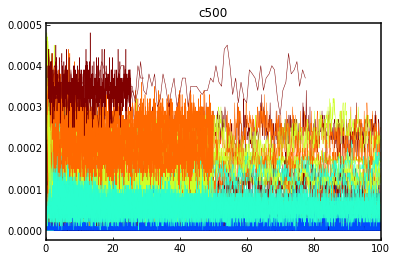

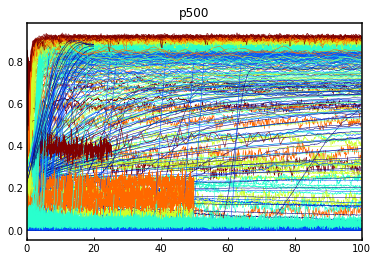

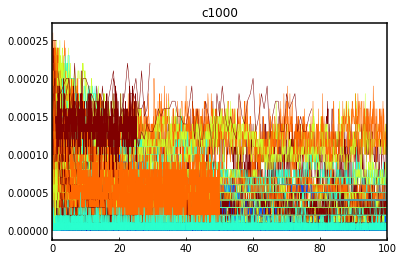

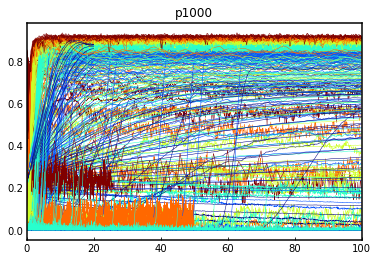

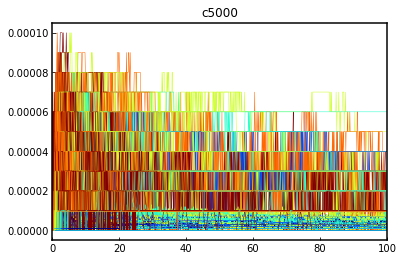

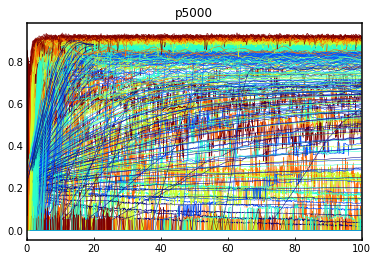

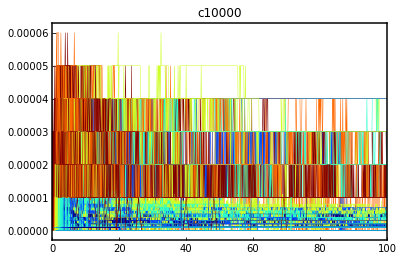

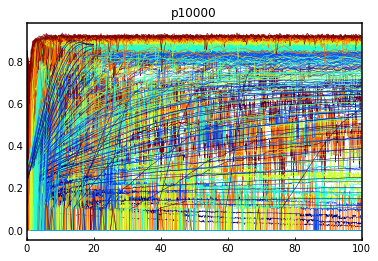

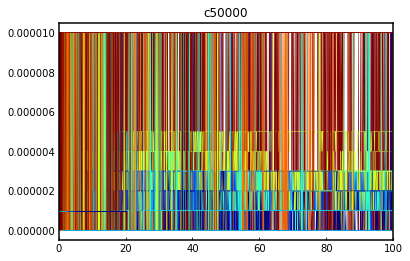

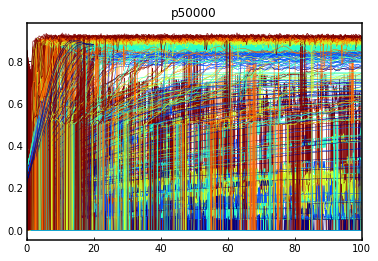

In [20]:
# Now let's look at the MCS data
mcs_headers = list(mcs[0])
print(mcs_headers)

for i in mcs_headers:
    for j in xrange(len(mcs)):
#         if mcs[j][i].iloc[-1] < 100:  
        plt.plot(mcs[j]['Timestep'], mcs[j][i] / params['N'][j], c=plt.cm.jet((params['phi'][j]-45)/25.))
    plt.title(str(i))
    plt.xlim(0, 100)
#     plt.ylim(0, 100)
    plt.show()


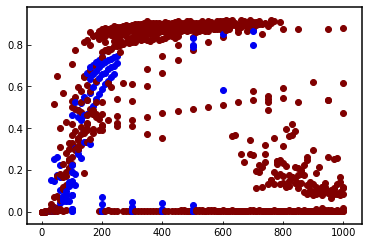

['c100', 'p100', 'c500', 'p500', 'c1000', 'p1000', 'c5000', 'p5000', 'c10000', 'p10000', 'c50000', 'p50000']


c100      p100      c500      p500     c1000     p1000     c5000  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
781  0.001500  0.298050  0.000030  0.026380  0.000010  0.014680  0.000000   
782  0.000011  0.472345  0.000001  0.471159  0.000001  0.471159  0.000001   
783  0.001320  0.439430  0.000120  0.206560  0.000040  0.151770  0.000010   
784  0.000810  0.509520  0.000120  0.385320  0.000110  0.377820  0.000010   
785  0.000720  0.583040  0.000110  0.475280  0.000100  0.468150  0.000040   

        p5000    c10000    p10000    c50000    p50000  
0    0.000000  0.000000  0.000000  0.000000  0.000000  
1    0.000000  0.000000  0.000000  0.000000  0.000000  
2    0.000000  0.000000  0.000000  0.000000  0.000000  
3    0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.000000  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...  
781  0.000000  0.000000  0.000000  0.000000  0.000000  
782  0.471159  0.000001  0.471159  0.000001  0.471159  
783  0.112800  0.000010  0.112800  0.000000  0.000000  
784  0.119840  0.000010  0.119840  0.000000  0.000000  
785  0.279850  0.000000  0.000000  0.000000  0.000000  

[786 rows x 12 columns]

In [21]:
# Let's take the last MCS for each parameter and plot vs that parameter
steady = []
for i in range(0, len(mcs)):
    steady.append(mcs[i]['LgClust'].iloc[-1] / float(params['N'][i]))
    plt.scatter(params['peA'][i], steady[i], c=plt.cm.jet(params['eps'][i]))
plt.show()
    
# Make a dataframe where each row is a different simulation and each column the header of MCS
header = list(mcs[0])
header.remove('Timestep')
header.remove('LgClust')
header.remove('c1')
header.remove('p1')
header.remove('c5')
header.remove('p5')
header.remove('c10')
header.remove('p10')
header.remove('c50')
header.remove('p50')
print(header)

# Now loop through this 
steady = []
for i in range(0, len(mcs)):
    steady.append([])
    for j in range(0, len(header)):
        steady[i].append(mcs[i][header[j]].iloc[-1] / float(params['N'][i]))
finalMCS = pd.DataFrame(steady, columns=header)
display(finalMCS)

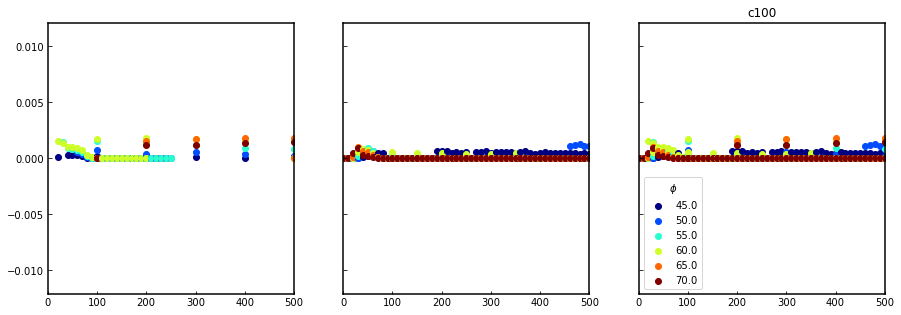

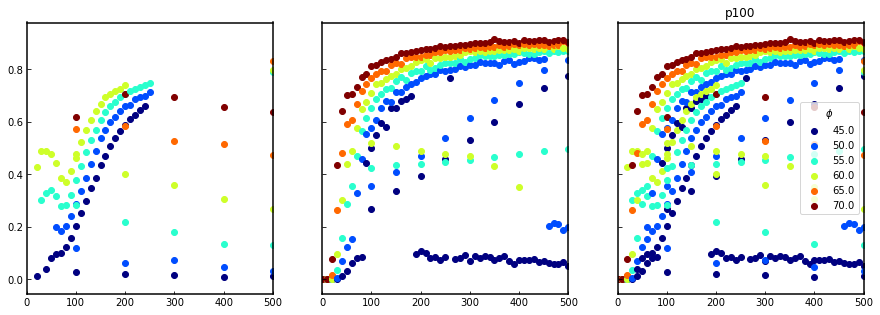

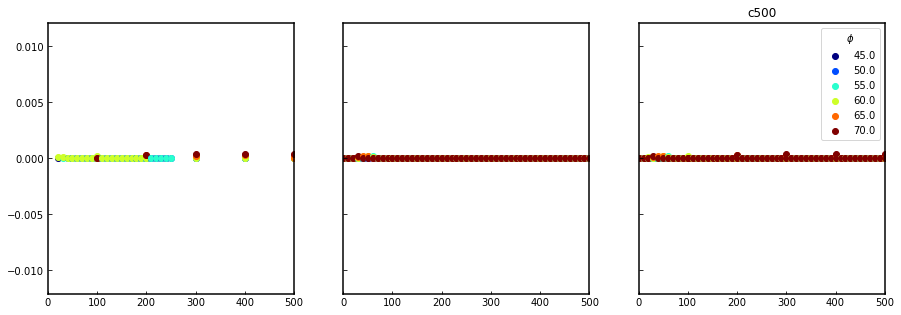

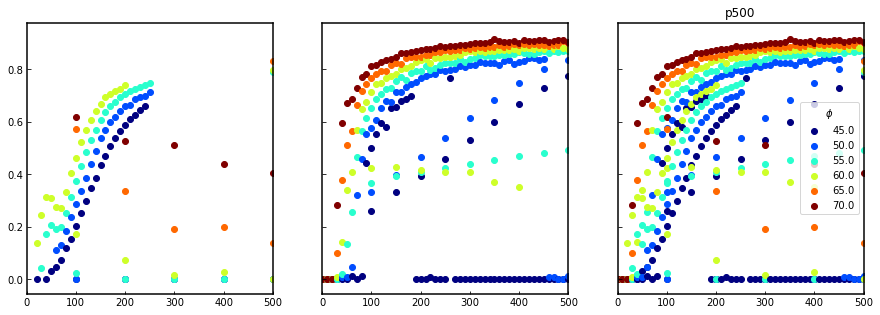

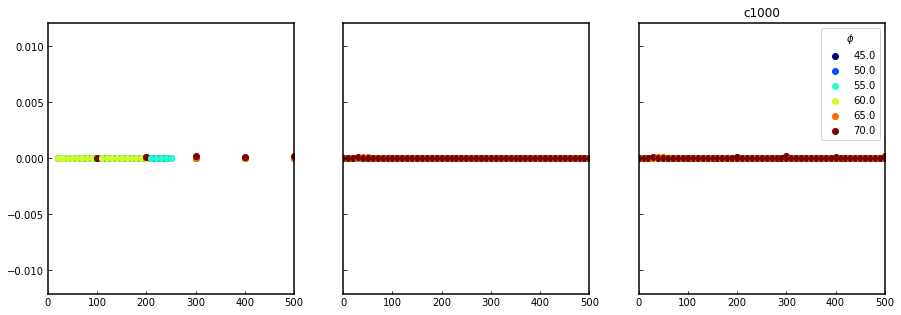

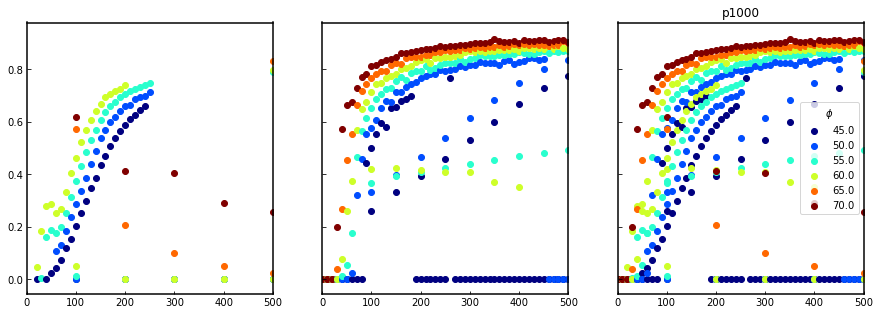

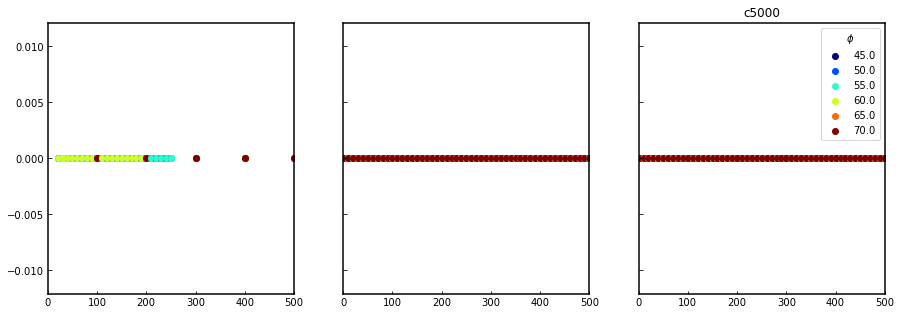

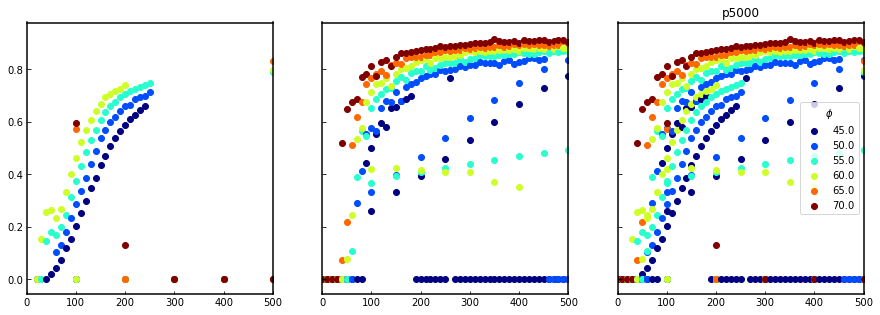

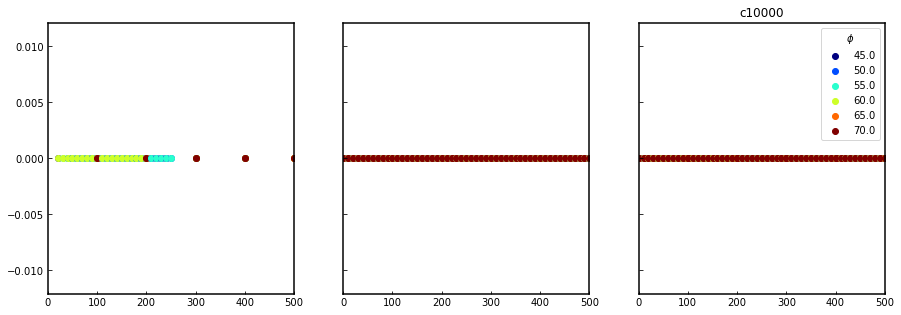

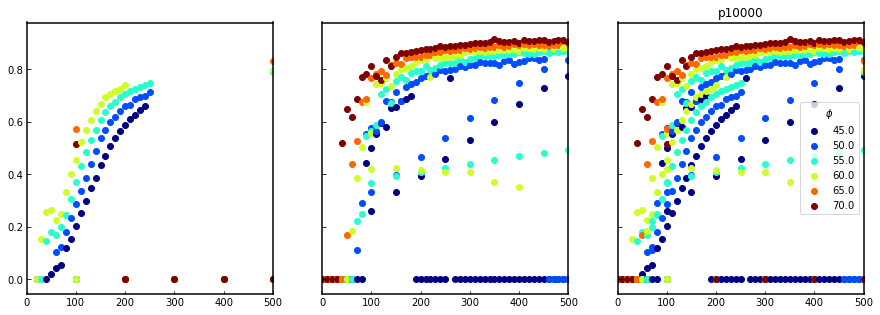

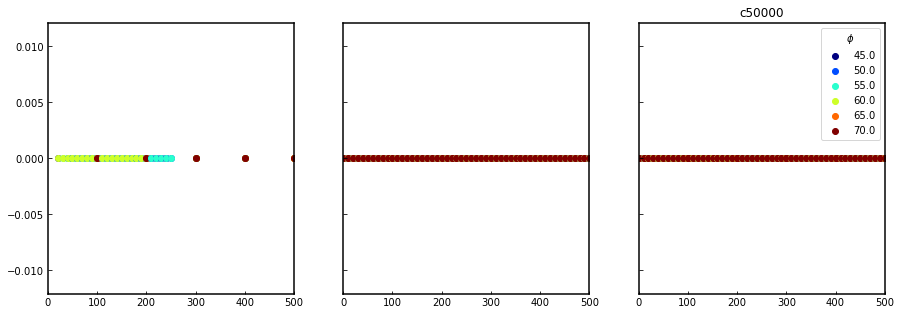

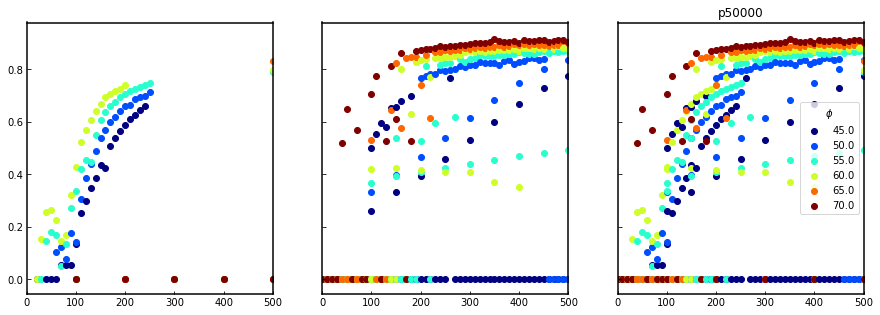

In [22]:
# We've made the dataframe now let's look at it
from collections import OrderedDict

for i in header:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
    for j in range(0, len(params['peA'])):
        ax[2].scatter(params['peA'][j], finalMCS[i][j], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
        if params['eps'][j] == 0.1:
            ax[0].scatter(params['peA'][j], finalMCS[i][j], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
        else:
            ax[1].scatter(params['peA'][j], finalMCS[i][j], c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title=r'$\phi$')
    plt.title(i)
    ax[0].set_xlim(0, 500)
    ax[1].set_xlim(0, 500)
    ax[2].set_xlim(0, 500)
    plt.show()

In [23]:
# Now let's look at the total area of the dense phase
refDen = 'Liq-r=5.0'
refMCS = 'p5000'

# Compute particle area from lattice spacing
def circleA(sigma):
    if sigma > 1.:
        sigma = 1.
    return np.pi * (sigma**2) * .25

ssDen = []
ssLat = []
ssAre = []
# Get the steady-state system density
for i in range(0, len(all_data)):
    ssDen.append(all_data[i][refDen].iloc[-1])
    ssLat.append(phiToLat(ssDen[-1]))
    ssAre.append(circleA(ssLat[-1]))
    
tot = list(zip(ssDen, ssLat, ssAre))
finalState = pd.DataFrame(tot, columns=['phiLiq', 'lattice', 'area'])
display(finalState)

phiLiq   lattice      area
0     0.455  1.411802  0.785398
1     0.510  1.333505  0.785398
2     0.555  1.278301  0.785398
3     0.610  1.219312  0.785398
4     0.660  1.172216  0.785398
..      ...       ...       ...
781   0.555  1.278301  0.785398
782   1.980  0.676779  0.359736
783   0.610  1.219312  0.785398
784   0.660  1.172216  0.785398
785   1.515  0.773701  0.470150

[786 rows x 3 columns]

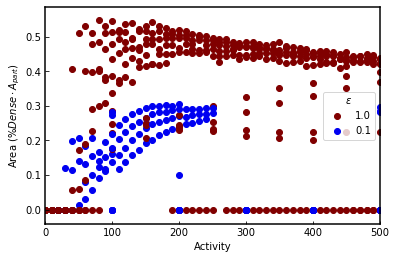

In [24]:
# Now we have a lattice spacing dataframe, plot the area of the dense phase vs. pe
refDen = 'Liq-r=5.0'
refMCS = 'p5000'

for i in range(0, len(all_data)):
    plt.scatter(params['peA'][i], finalState['area'][i] * finalMCS[refMCS][i], c=plt.cm.jet(params['eps'][i]), label=params['eps'][i])
plt.xlabel('Activity')
plt.ylabel(r'Area $(\% Dense \cdot A_{part})$')
plt.xlim(0, 500.)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\epsilon$')
plt.show()

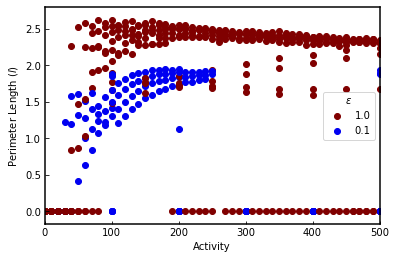

In [25]:
# What if I compute a length from the area (assume we have a circle)
def getCirc(area):
    return (2. * np.pi * np.sqrt(area/np.pi))

for i in range(0, len(all_data)):
    plt.scatter(params['peA'][i], getCirc(finalState['area'][i] * finalMCS[refMCS][i]), c=plt.cm.jet(params['eps'][i]), label=params['eps'][i])
plt.xlabel('Activity')
plt.ylabel(r'Perimeter Length $(l)$')
plt.xlim(0, 500.)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\epsilon$')
plt.show()

In [26]:
# So, there are fewer particles participating in the dense phase AND the dense phase is denser

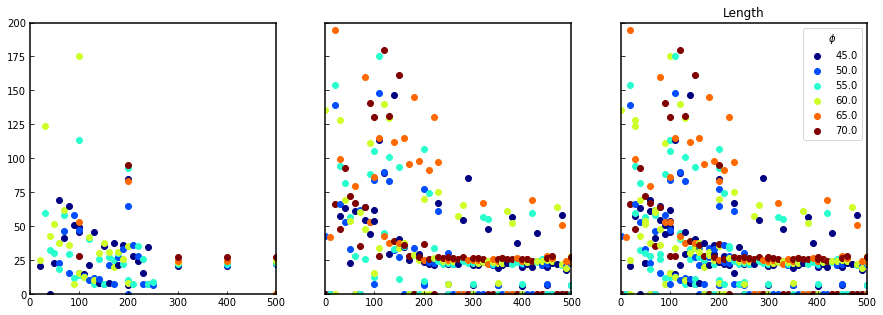

In [31]:
# Let's look at the cluster length data as it pertains to the system parameters
def getLBox(N, phi):
    '''sqrt(N * pi * sigma**2 / (4*phi))'''
    return np.sqrt((N * np.pi)/(4. * phi))

i = 'Length'
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for j in range(0, len(params['peA'])):
    l_box = getLBox(params['N'][j], params['phi'][j])
    ax[2].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
    if params['eps'][j] == 0.1:
        ax[0].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
    else:
        ax[1].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['phi'][j] - 45.)/25.), label=params['phi'][j])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$\phi$')
plt.title(i)
ax[0].set_xlim(0, 500)
ax[1].set_xlim(0, 500)
ax[2].set_xlim(0, 500)
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[2].set_ylim(0, 200)

plt.show()

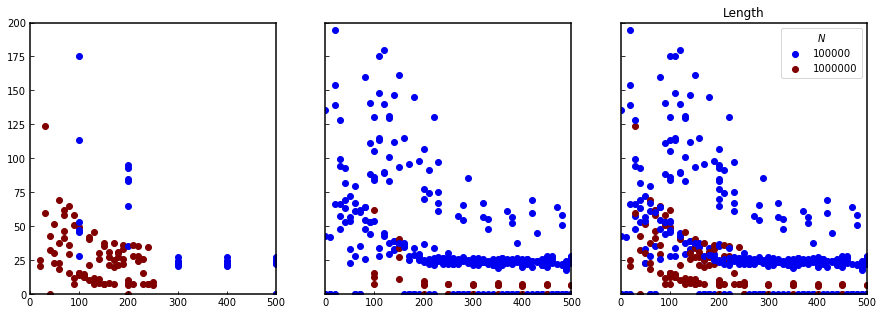

In [36]:
# Let's look at the cluster length data as it pertains to the system parameters
def getLBox(N, phi):
    '''sqrt(N * pi * sigma**2 / (4*phi))'''
    return np.sqrt((N * np.pi)/(4. * phi))

i = 'Length'
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for j in range(0, len(params['peA'])):
    l_box = getLBox(params['N'][j], params['phi'][j])
    ax[2].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['N'][j])/1000000.), label=params['N'][j])
    if params['eps'][j] == 0.1:
        ax[0].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['N'][j])/1000000.), label=params['N'][j])
    else:
        ax[1].scatter(params['peA'][j], edg[j][i]/l_box, c=plt.cm.jet((params['N'][j])/1000000.), label=params['N'][j])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title=r'$N$')
plt.title(i)
ax[0].set_xlim(0, 500)
ax[1].set_xlim(0, 500)
ax[2].set_xlim(0, 500)
ax[0].set_ylim(0, 200)
ax[1].set_ylim(0, 200)
ax[2].set_ylim(0, 200)

plt.show()

In [28]:
# Let's compute and look at the MCS
mcs_raw = []
mcs_thresh = []
mcs_1000 = []
for i in xrange(len(mcs)):
    mcs_raw.append(mcs[i]['all_parts'] / mcs[i]['N_clusts'])
    mcs_thresh.append(mcs[i]['thr_parts'] / mcs[i]['thr_clusts'])
    mcs_1000.append(mcs[i]['thr_p1000'] / mcs[i]['thr_c1000'])
    
for i in xrange(len(mcs)):
    plt.plot(mcs[i]['Timestep'], mcs_raw[i])
plt.xlim(1,)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for i in xrange(len(mcs)):
    if mcs_thresh[i].iloc[-1] > 100:
        plt.plot(mcs[i]['Timestep'], mcs_thresh[i], c=plt.cm.jet((params['phi'][i]-45)/25.))
plt.xlim(10,)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for i in xrange(len(mcs)):
#     if mcs_thresh[i].iloc[-1] > 100:
    plt.plot(mcs[i]['Timestep'], mcs_1000[i], c=plt.cm.jet((params['phi'][i]-45)/25.))
# plt.xlim(10,)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


KeyError: 'all_parts'

In [ ]:
# Let's write a moving average for the MCS data
def movingAverage(inList, window=10):
    '''Read in the list to process and the window to average over'''
    side = window / 2
    outList = []
    for i in range(side, len(inList) - side):
        outList.append(np.mean(inList[i-side:i+side]))
    return outList

# Test the function
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
win = 20
smoothed = movingAverage(y, win)
import scipy.signal
smoothedSav = scipy.signal.savgol_filter(y, 51, 3)
plt.plot(x, y, c='r', lw=1.5)
plt.plot(x[win/2:len(x)-(win/2)], smoothed, c='b', lw=1.5)
plt.plot(x, smoothedSav, c='g', lw=1.5)
plt.show()

In [ ]:
# Test it with data
win = 10
side = win / 2
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i in xrange(len(mcs)):
    mcs_1000[i].fillna(0, inplace=True)
    ax[0].plot(mcs[i]['Timestep'], mcs_1000[i], c=plt.cm.jet((params['phi'][i]-45)/25.))
    smoothed = movingAverage(mcs_1000[i], win)
    ax[1].plot(mcs[i]['Timestep'][side:len(mcs[i]['Timestep'])-side], smoothed, c=plt.cm.jet((params['phi'][i]-45)/25.))
    smoothedSav = scipy.signal.savgol_filter(mcs_1000[i], 51, 3)
    ax[2].plot(mcs[i]['Timestep'], smoothedSav, c=plt.cm.jet((params['phi'][i]-45)/25.))
# plt.xlim(10,)
ax[0].set_title('Original')
ax[1].set_title('Moving Average')
ax[2].set_title('Savgol Filter')
ax[0].set_ylim(0,)
ax[1].set_ylim(0,)
ax[2].set_ylim(0,)
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
plt.show()

# Test it with data
win = 10
side = win / 2
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i in xrange(len(mcs)):
    mcs_1000[i].fillna(0, inplace=True)
    ax[0].plot(mcs[i]['Timestep'], mcs_1000[i], c=plt.cm.jet(params['peA'][i]/500.))
    smoothed = movingAverage(mcs_1000[i], win)
    ax[1].plot(mcs[i]['Timestep'][side:len(mcs[i]['Timestep'])-side], smoothed, c=plt.cm.jet(params['peA'][i]/500.))
    smoothedSav = scipy.signal.savgol_filter(mcs_1000[i], 101, 3)
    ax[2].plot(mcs[i]['Timestep'], smoothedSav, c=plt.cm.jet(params['peA'][i]/500.))
# plt.xlim(10,)
ax[0].set_title('Original')
ax[1].set_title('Moving Average')
ax[2].set_title('Savgol Filter')
ax[0].set_ylim(0,)
ax[1].set_ylim(0,)
ax[2].set_ylim(0,)
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
plt.show()